In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import datetime
import scipy
import scipy.stats as stats
import seaborn as sns

In [3]:
df=pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.Country.value_counts().reset_index().head(20)

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


# The unique customers of the retailer having customer ID and their percentage of orders by top 10 orders.

In [5]:
df.CustomerID.unique().shape

(4373,)

In [6]:
(df.CustomerID.value_counts()/sum(df.CustomerID.value_counts())*100).head(13).cumsum()

17841.0    1.962249
14911.0    3.413228
14096.0    4.673708
12748.0    5.814728
14606.0    6.498553
15311.0    7.110850
14646.0    7.623350
13089.0    8.079807
13263.0    8.492020
14298.0    8.895138
15039.0    9.265809
14156.0    9.614850
18118.0    9.930462
Name: CustomerID, dtype: float64

# Out of 4373 unique customers only 13 were ordered the 10% of the total sales of retailer based on cumulative sum.

In [7]:
df.StockCode.unique().shape

(4070,)

In [8]:
df.Description.unique().shape

(4224,)

#  From the above, we observed that there is a mismatch between StockCode and Description and also number of Descriptions more than the Stock code values,which means that we have multiple descriptions for some of the Stockcodes

SyntaxError: unexpected EOF while parsing (<ipython-input-11-e81318a260b2>, line 2)

In [12]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [13]:
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

# The output of the two attributes having negitive values,which means that may have some return transactions in this data.

The RFM (Recency,Frequency,Monetary value) based model of customer value for finding the customer segments.

In [14]:
#Data preprocessing
#Separate data for one geography


df=df[df.Country=='United Kingdom']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df['Amount']=df.Quantity*df.UnitPrice
df['Amount'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Amount, dtype: float64

In [16]:
#Remove negative or return transactions

df=df[~(df['Amount']<0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
#Remove transactions having missing values for the Customer ID field

df=df[~(df.CustomerID.isnull())]
print(df.shape)
df.head()

(354345, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Create the RFM model (Recency, Frequency,Monetary value)

Recency

To create a Recency feature variable, we need to decide the reference date for analysis and we wil define the reference date as one day before the last transaction.

In [19]:
#selecting specific features from dataset and creating new
uk_data=df[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice','Amount']]

In [20]:
#first  5 observations of our UK dataset
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Amount
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [21]:
#checking maximum and minimum timestamp in dataset
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

Recency = Latest Date - Last Inovice Data

Frequency = count of invoice no. of transaction(s)

Monetary = Sum of Total Amount for each customer

Text(0.5, 0, 'Hours')

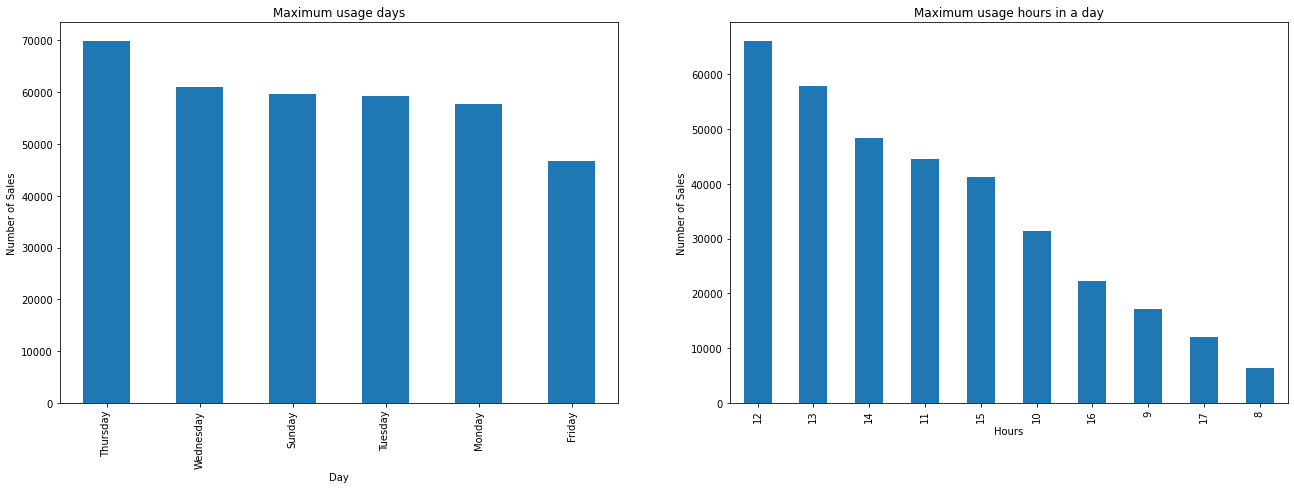

In [25]:
import datetime as dt
 
fig,ax=plt.subplots(1,2)
df.InvoiceDate.dt.day_name().value_counts().nlargest(10).plot(kind='bar', figsize=(20,7),ax=fig.axes[0])
ax[0].set_title("Maximum usage days")
ax[0].set_ylabel('Number of Sales')
ax[0].set_xlabel('Day')
 
df.InvoiceDate.dt.hour.value_counts().nlargest(10).plot(kind='bar', figsize=(22,7),ax=fig.axes[1])
plt.title("Maximum usage hours in a day")
plt.ylabel('Number of Sales')
plt.xlabel('Hours')

Maximum sales has happened on Thursdays and Wednesdays at around 12 PM to 2 PM and so we have to start triggering offers and special incentives on these days

In [26]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

<ipython-input-26-6edc12c59f10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])


In [27]:
#creating  dataframe for Recency ,Frequency, Monetary as 'rfm'
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Amount': lambda price: price.sum()})

In [28]:
#columns in rfm dataframe
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'Amount'], dtype='object')

In [29]:
#renaming columns
rfm.columns=['recency','frequency','monetary']

In [30]:
#convert recency as int type
rfm['recency'] = rfm['recency'].astype(int)

In [31]:
#resetting index of dataframe
rfm.reset_index(inplace = True)
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [32]:
#checking updated names of rfm
rfm.columns

Index(['CustomerID', 'recency', 'frequency', 'monetary'], dtype='object')

# Customers with the low recency, high frequency and high monetary amounts considered as top customers.

In [33]:
#statistical description of rfm dataset
rfm.describe()

,CustomerID,recency,frequency,monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.722265,90.371079,1863.910113
std,1576.823683,99.528532,217.796155,7481.922217
min,12346.000000,0.000000,1.000000,0.000000
25%,14208.000000,17.000000,17.000000,300.040000
50%,15569.000000,50.000000,41.000000,651.820000
75%,16913.000000,142.000000,99.000000,1575.890000
max,18287.000000,373.000000,7847.000000,259657.300000


C:\Users\tset\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


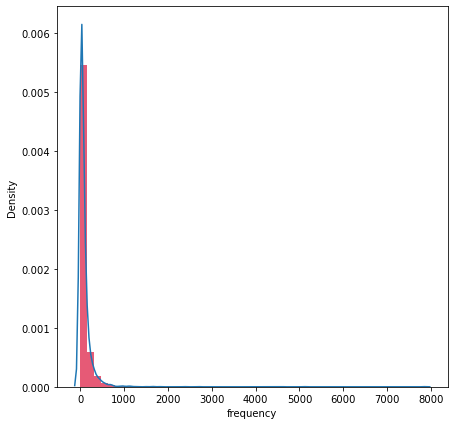

In [34]:
#Distribution of frequency
#checking frequency distribution in our dataset
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
sns.distplot(rfm["frequency"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7});

Distribution of frequency

C:\Users\tset\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


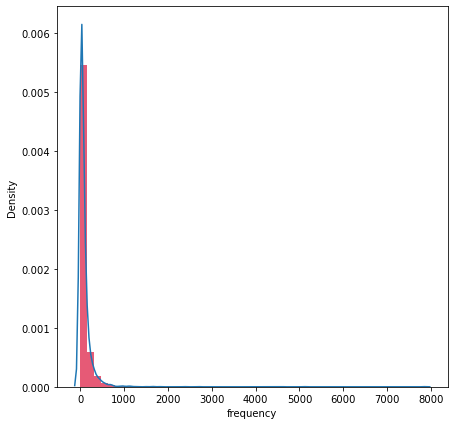

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
sns.distplot(rfm["frequency"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7});

Distribution of recency

C:\Users\tset\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tset\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recency', ylabel='Density'>

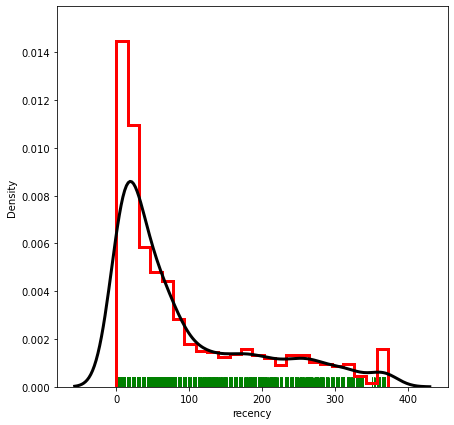

In [37]:
x= rfm['recency']

plt.figure(figsize=(7,7))
sns.distplot(x, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "r"},
             )

Distribution of monetary

C:\Users\tset\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monetary', ylabel='Density'>

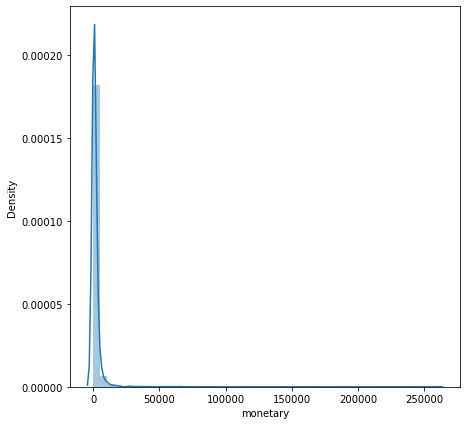

In [38]:
x = rfm['monetary']
plt.figure(figsize=(7,7))
sns.distplot(x)

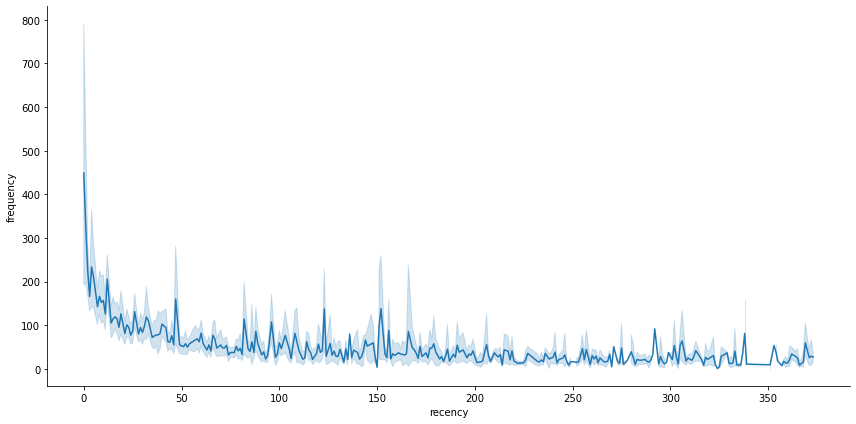

In [39]:
#plotting relationship between recency and frequency
sns.relplot(x="recency", y="frequency", kind="line", data=rfm,height=6,aspect=2 )

As we can see that when recency goes above 20 ,frequency drops significantly

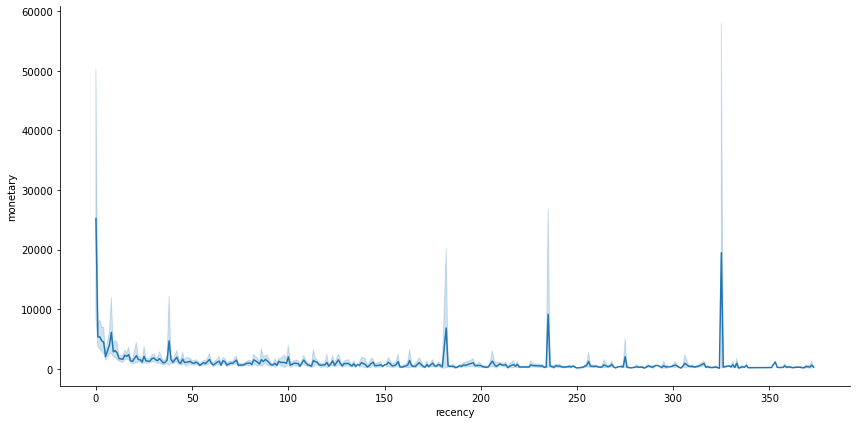

In [40]:
#plotting relationship between recency and monetary
sns.relplot(x="recency", y="monetary", kind="line", data=rfm,height=6,aspect=2);

The sudden spikes shows that there are some customers whose arrival rate is not uniform though they have been adding a good monetary value.

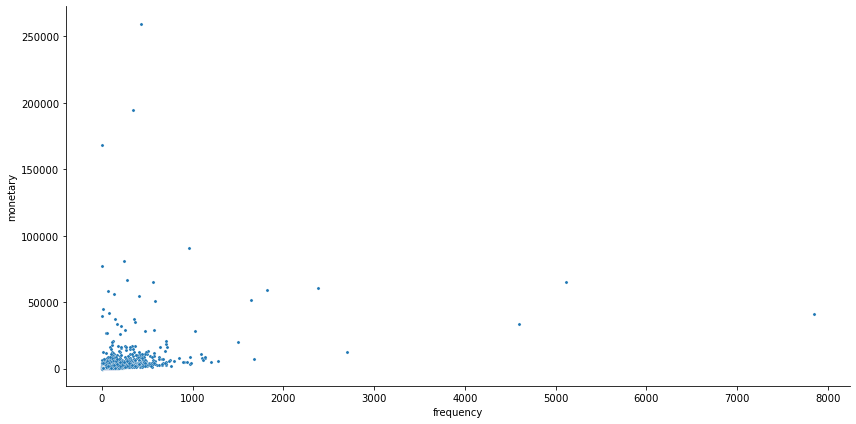

In [41]:
#plotting relationship between monetory and frequency
sns.relplot(x="frequency", y="monetary", kind="scatter", data=rfm,s=10,height=6,aspect=2);

This shows that we have most of our monetary values comes from frequnecy<800

In [42]:
#defining and adding  quartiles for rfm score
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [43]:
#checking observations from updated dataset 
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4596,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


In [44]:
#adding scores and concatenating them as 125 different observations (from 111 to 555) 
rfm['rfm_rating'] = rfm.r_quartile.astype(int)+ rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)
rfm['rfm_concat'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat
0,12346.0,325,1,77183.60,4,4,1,9,441
1,12747.0,2,103,4196.01,1,1,1,3,111
2,12748.0,0,4596,33719.73,1,1,1,3,111
3,12749.0,3,199,4090.88,1,1,1,3,111
4,12820.0,3,59,942.34,1,2,2,5,122


C:\Users\tset\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tset\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rfm_rating', ylabel='Density'>

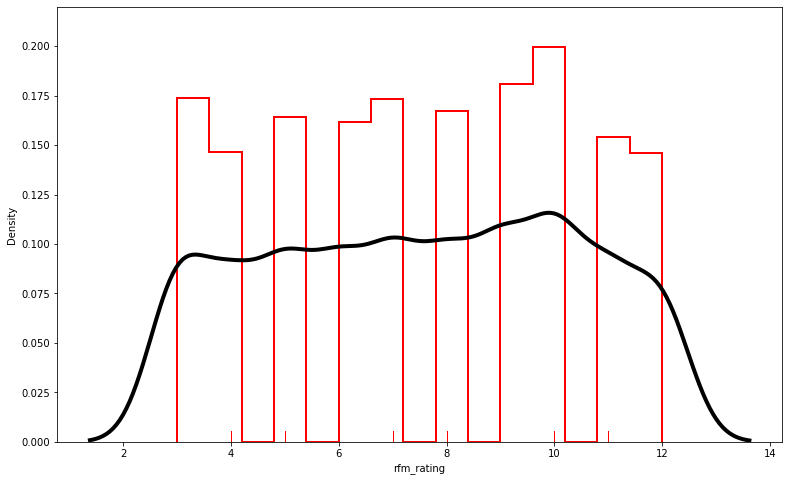

In [45]:
#plotting distribution of rfm rating
x= rfm['rfm_rating']

plt.figure(figsize=(13,8))
sns.distplot(x, rug=True, rug_kws={"color": "r"},
                  kde_kws={"color": "k", "lw": 4, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "r"},
        
             )

In [46]:
df_cust = rfm.copy()

In [47]:
df_cust.isin([0]).any().any()

True

In [48]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  3921 non-null   float64 
 1   recency     3921 non-null   int32   
 2   frequency   3921 non-null   int64   
 3   monetary    3921 non-null   float64 
 4   r_quartile  3921 non-null   category
 5   f_quartile  3921 non-null   category
 6   m_quartile  3921 non-null   category
 7   rfm_rating  3921 non-null   int32   
 8   rfm_concat  3921 non-null   object  
dtypes: category(3), float64(2), int32(2), int64(1), object(1)
memory usage: 165.3+ KB


In [49]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm['recency'] = [handle_neg_n_zero(x) for x in rfm.recency]
rfm['monetary'] = [handle_neg_n_zero(x) for x in rfm.monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm[['recency', 'frequency', 'monetary']].apply(np.log, axis = 1).round(3)

In [50]:
#creating new feature by applying log on values after removing zero and neagtive values from rfm
from sklearn import preprocessing
from numpy import math
rfm['recency_log'] = rfm['recency'].apply(math.log)
rfm['frequency_log'] = rfm['frequency'].apply(math.log)
rfm['monetary_log'] = rfm['monetary'].apply(math.log)

Models Implementation
Applying Unsupervised Algorithm for clustering

In [51]:

#importing libraries and model
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


#selecting data for preprocessig(scaling) & training for fitting on our model
from sklearn.cluster import KMeans
rec_mon=['recency_log','monetary_log']
X_features_rec_mon=rfm[rec_mon].values
scaler=preprocessing.StandardScaler()
X_rm=scaler.fit_transform(X_features_rec_mon)
X=X_rm
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4229304223999677
For n_clusters = 3, silhouette score is 0.3467462909089942
For n_clusters = 4, silhouette score is 0.36572545801401474
For n_clusters = 5, silhouette score is 0.33822936712052487
For n_clusters = 6, silhouette score is 0.3414582678031068
For n_clusters = 7, silhouette score is 0.3410728716412475
For n_clusters = 8, silhouette score is 0.3389264418405515
For n_clusters = 9, silhouette score is 0.346158971378615
For n_clusters = 10, silhouette score is 0.3465506669488105
For n_clusters = 11, silhouette score is 0.33651473880729366
For n_clusters = 12, silhouette score is 0.3445958847505136
For n_clusters = 13, silhouette score is 0.3423928330765011
For n_clusters = 14, silhouette score is 0.34192118208218536
For n_clusters = 15, silhouette score is 0.3405221108591134


We have good silhouette score for 2 clusters.


Elbow method

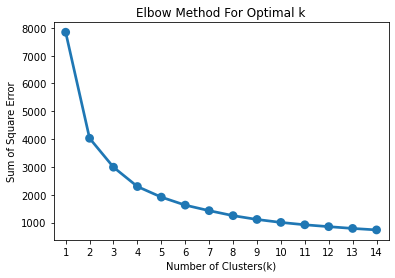

In [53]:
#visualising by elbow method
sse = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sse[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Error')
plt.title('Elbow Method For Optimal k')
plt.show()

From the plot we can easily visualise that we are getting the value of K(no. of clusters) K=2 or 3

In [54]:
#defining clusters as 2 and applying kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

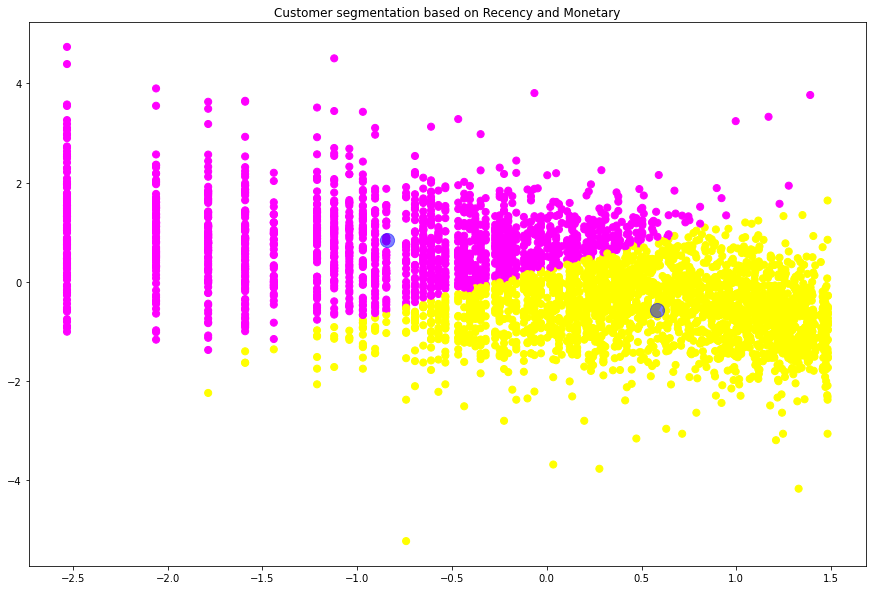

In [55]:
#plotting segmentation based on Recency and Monetary
plt.figure(figsize=(15,10))
plt.title('Customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

Above shown plot is for K=2.

In [56]:
#taking as values and transforming in our dataset 
feature_vector=['recency_log','frequency_log','monetary_log']
X_features=rfm[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

Silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.3957339992194828
For n_clusters = 3 The average silhouette_score is : 0.30686125930082103
For n_clusters = 4 The average silhouette_score is : 0.29860546785504366
For n_clusters = 5 The average silhouette_score is : 0.2784540882227421
For n_clusters = 6 The average silhouette_score is : 0.2772589588332905


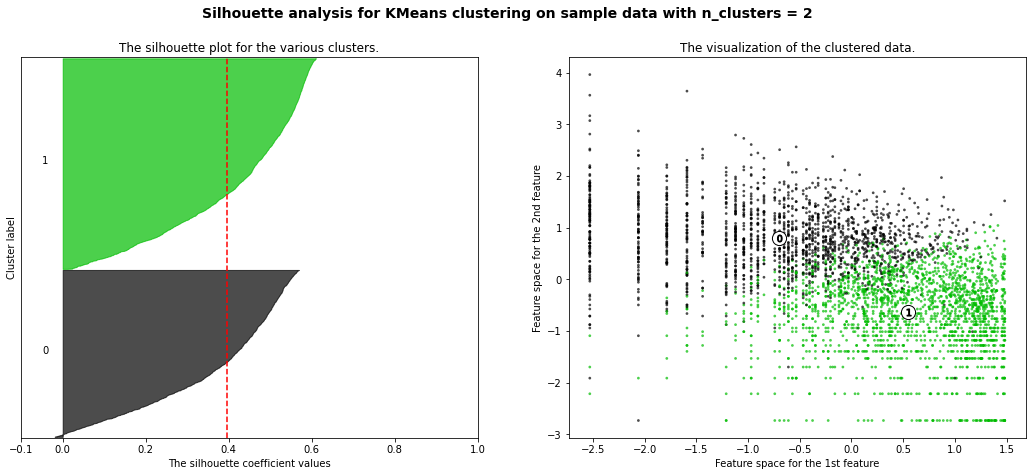

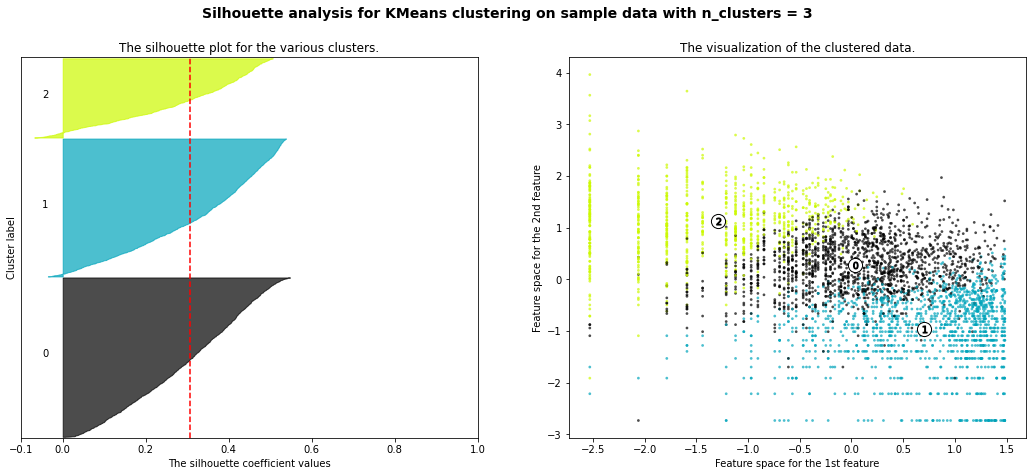

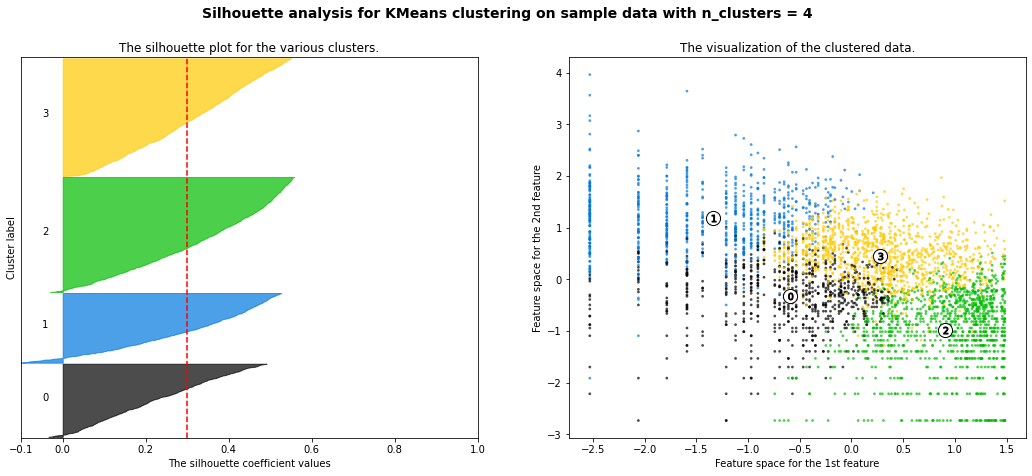

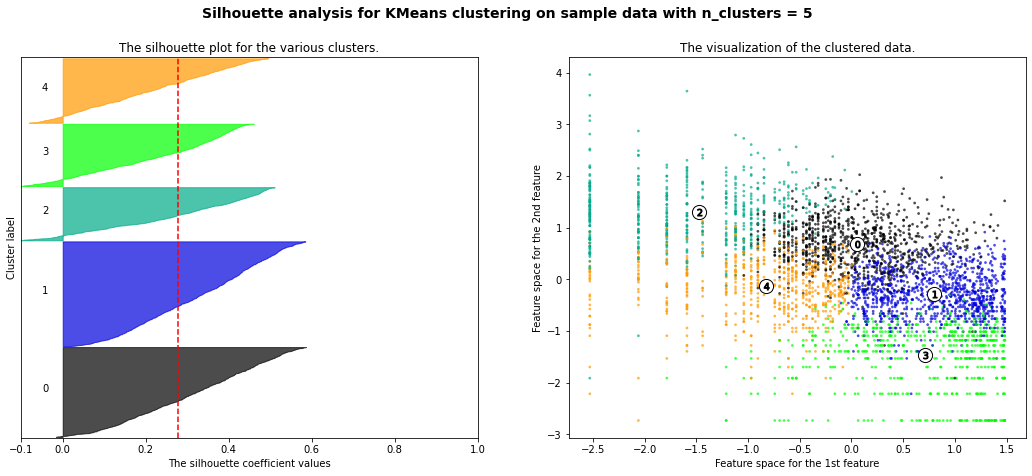

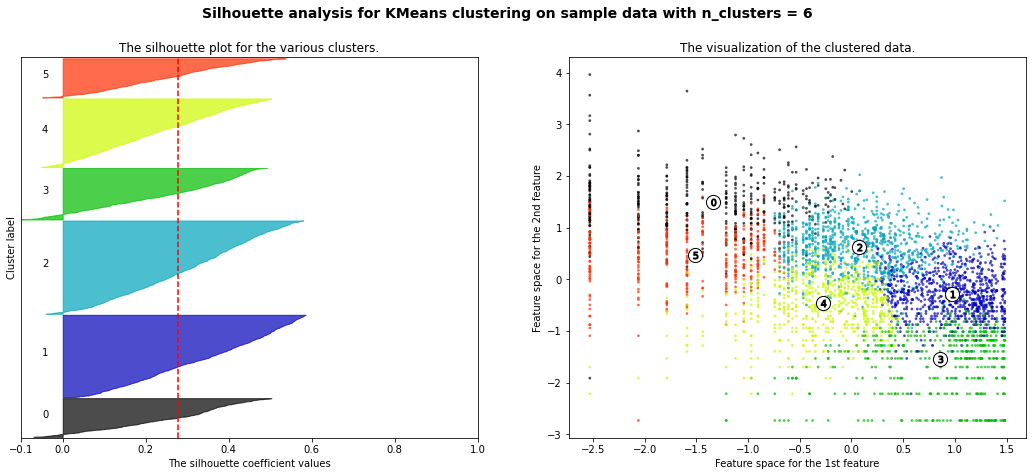

In [57]:
#applying silhoutte score method
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Hierarchical clustering

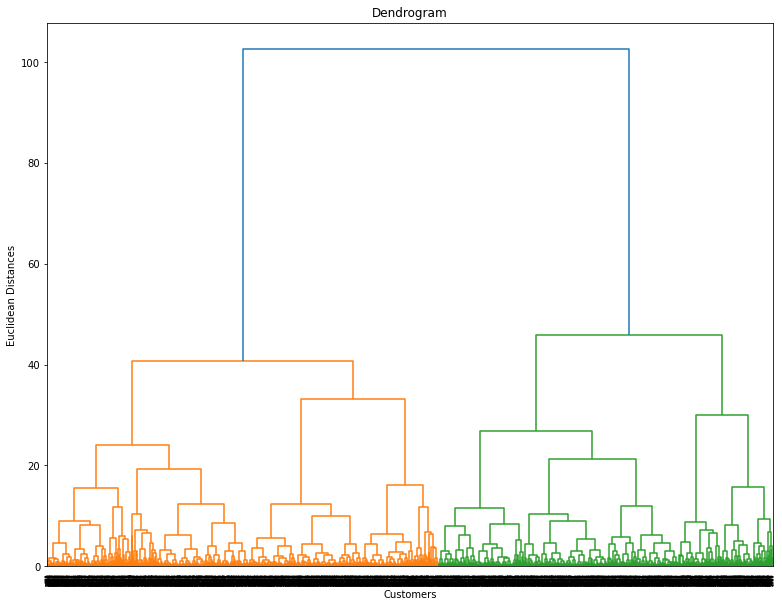

In [58]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [59]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

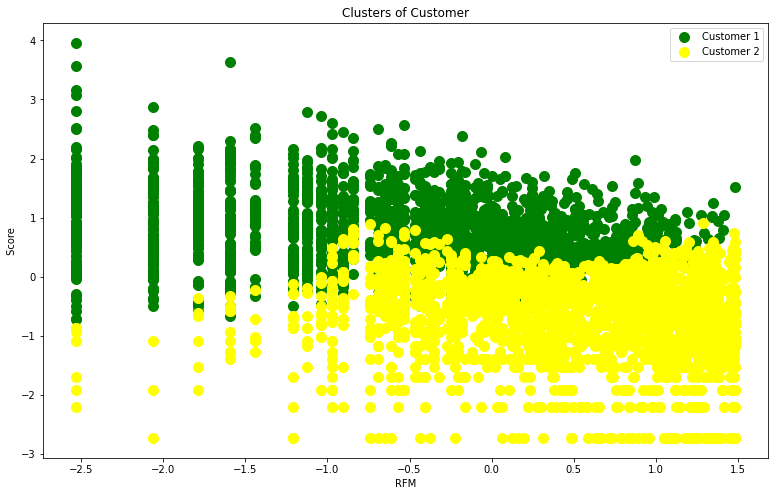

In [60]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'green', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Customer 2')


plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel(' Score ')
plt.legend()
plt.show()

Implemented hierarchical clustering to our dataset,as shown in the above plot

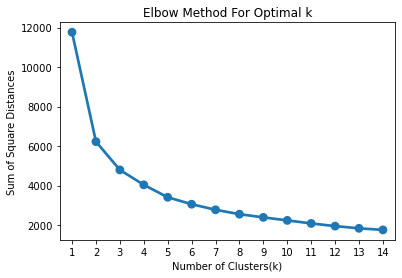

In [61]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Making 4 clusters according to elbow method

In [62]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Finding the clusters and assigning values for the observation given in the dataset
rfm['Cluster'] = KMean_clust.labels_
rfm.head(10)

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster
0,12346.0,325,1,77183.60,4,4,1,9,441,5.783825,0.000000,11.253942,2
1,12747.0,2,103,4196.01,1,1,1,3,111,0.693147,4.634729,8.341889,0
2,12748.0,1,4596,33719.73,1,1,1,3,111,0.000000,8.432942,10.425838,0
3,12749.0,3,199,4090.88,1,1,1,3,111,1.098612,5.293305,8.316515,0
4,12820.0,3,59,942.34,1,2,2,5,122,1.098612,4.077537,6.848366,0
5,12821.0,214,6,92.72,4,4,4,12,444,5.365976,1.791759,4.529584,1
6,12822.0,70,46,948.88,3,2,2,7,322,4.248495,3.828641,6.855282,2
7,12823.0,74,5,1759.50,3,4,1,8,341,4.304065,1.609438,7.472785,1
8,12824.0,59,25,397.12,3,3,3,9,333,4.077537,3.218876,5.984239,3
9,12826.0,2,91,1474.72,1,2,2,5,122,0.693147,4.510860,7.296223,0


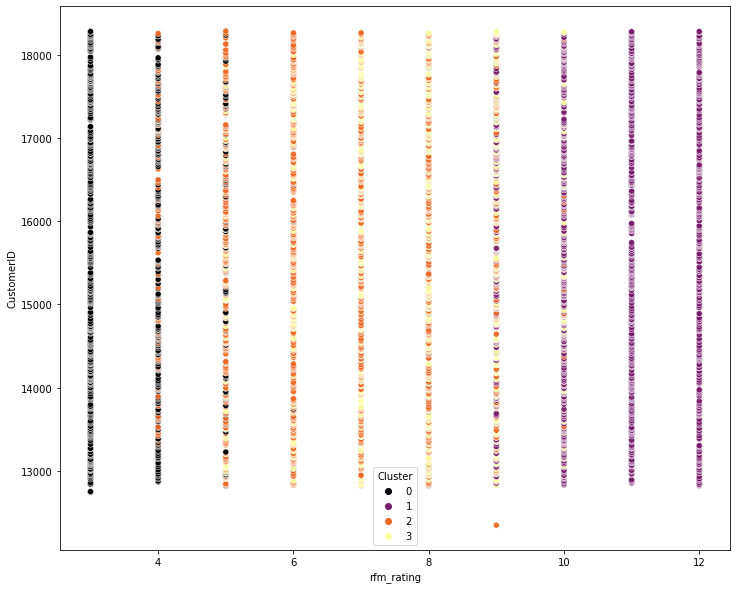

In [63]:
#plotting for hour and month_day
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(x='rfm_rating', y='CustomerID', hue='Cluster',palette='inferno',data=rfm,x_bins=50,y_bins=50,alpha=0.95);

This shows that we have highest rfm_rating for 1st cluster. But there is a caveat rfm rating has maximum values as 12 but recency value should be less in order to have observation of a good customer.

In [64]:
#creating new colum for frequency and monetary value
rfm['freq_mont']  = rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)

In [65]:
#checking top 2 values
rfm.head(2)

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster,freq_mont
0,12346.0,325,1,77183.60,4,4,1,9,441,5.783825,0.000000,11.253942,2,5
1,12747.0,2,103,4196.01,1,1,1,3,111,0.693147,4.634729,8.341889,0,2


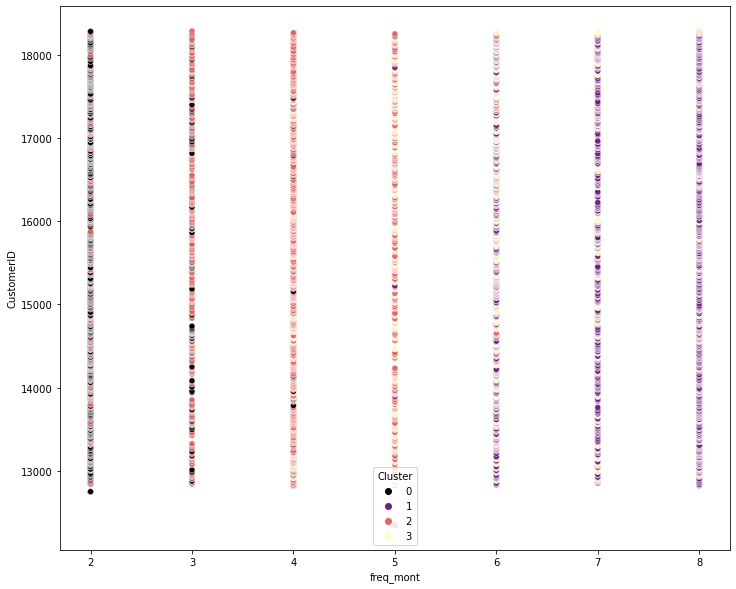

In [66]:
#plotting for hour and month_day
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(x='freq_mont', y='CustomerID', hue='Cluster',palette='magma',data=rfm,x_bins=50,y_bins=50,alpha=0.95);

From this we can observe that cluster 1 have the maximum value of frequency and monetary i.e. above 6 so we can focus and manage our resources more effectively on these observations for each cluster. Cluster 2 is our those customer having low frequency and monetary value.

In [67]:
#checking how many such cutomers are there for good frequency and monetary score rating
c1=rfm.loc[rfm['freq_mont'] > 6]
c1

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster,freq_mont
5,12821.0,214,6,92.72,4,4,4,12,444,5.365976,1.791759,4.529584,1,8
12,12829.0,336,11,293.00,4,4,4,12,444,5.817111,2.397895,5.680173,1,8
14,12831.0,262,9,215.05,4,4,4,12,444,5.568345,2.197225,5.370871,1,8
19,12837.0,173,12,134.10,4,4,4,12,444,5.153292,2.484907,4.898586,1,8
31,12852.0,294,17,311.55,4,4,3,11,443,5.683580,2.833213,5.741560,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,18277.0,58,8,110.38,3,4,4,11,344,4.060443,2.079442,4.703929,1,8
3915,18278.0,73,9,173.90,3,4,4,11,344,4.290459,2.197225,5.158480,1,8
3916,18280.0,277,10,180.60,4,4,4,12,444,5.624018,2.302585,5.196285,1,8
3917,18281.0,180,7,80.82,4,4,4,12,444,5.192957,1.945910,4.392224,1,8


In [68]:
#checking those customers having low frequency and monetary rating 
c2=rfm.loc[rfm['freq_mont'] < 4]
c2

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster,freq_mont
1,12747.0,2,103,4196.01,1,1,1,3,111,0.693147,4.634729,8.341889,0,2
2,12748.0,1,4596,33719.73,1,1,1,3,111,0.000000,8.432942,10.425838,0,2
3,12749.0,3,199,4090.88,1,1,1,3,111,1.098612,5.293305,8.316515,0,2
18,12836.0,59,175,2612.86,3,1,1,5,311,4.077537,5.164786,7.868201,2,2
20,12838.0,33,123,683.13,2,1,2,5,212,3.496508,4.812184,6.526685,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,18259.0,24,42,2338.60,2,2,1,5,221,3.178054,3.737670,7.757308,2,3
3902,18260.0,172,134,2643.20,4,1,1,6,411,5.147494,4.897840,7.879746,2,2
3910,18272.0,2,166,3078.58,1,1,1,3,111,0.693147,5.111988,8.032224,0,2
3919,18283.0,3,756,2094.88,1,1,1,3,111,1.098612,6.628041,7.647252,0,2


So we have total of 1129 customers having very high frequency and monetary(spending score) and 2139 customers having low frequency and monetary values.

We can target this cluster of 1129 Customers by identifying them via ID and can do some strategic planning to target each segment.

# Inference

1.United Kingdom and Saudi arabia has highest and lowest occurence in the dataset.

2.Month of November has highest sale. Similarly in weekdays Thursday have highest sale.

3.We have good sales in first 8 days of the month specifically on 4th day. As we go towards month end the sales starts declining.

4.Maximum sales happen on Thursdays and Wednesdays around 11 AM to 4 PM and so we have to start triggering offers and special incentives on these days

5.Most frequently used item is PAPER CRAFT,LITTLE BIRDIE and least frequently used item is CAPIZ CHANDELIER.

6.Most purchased item is WHITE HANGING HEART T-LIGHT HOLDER and Least purchased item is FRYING PAN RED POLKADOT.

7.The percentage of repeat customers are substantially more than the percentage of one-time customers. Mostly customers are happy with the retail store, We have to convert the one-time customers into repeat customers by offering them good incentives and proper service.

# So after doing customer segmentation we can say the company should focus on High monetary and more frequent(Target customer) and apart from that they can also focus High monetary value but less frequent customer by giving lucrative offers and coupons.